# Week 9: Time Series Analysis and Forecasting 
Implementing ARIMA, Prophet, and LSTMs for Time Series Forecasting


## Table of Contents
1. [**Tools and Packages**](#tools-and-packages)  
2. [**Data Exploration and Preprocessing**](#data-exploration-and-preprocessing)  
3. [**ARIMA Model**](#arima-model)  
4. [**Prophet Model**](#conclusion)
5. [**LSTM Model**](#ltsm-model)  


## Tools and Packages

Tools Required
- Python 3.x
- Jupyter Notebook (via Anaconda or VS Code)
- Open-source Python libraries:
   - pandas, numpy, matplotlib, seaborn
   - statsmodels (for ARIMA)
   - prophet (for Facebook Prophet)
   - scikit-learn
   - tensorflow / keras (for LSTM)

In [2]:
%pip install pandas numpy matplotlib seaborn statsmodels prophet scikit-learn tensorflow


Note: you may need to restart the kernel to use updated packages.


### Sample Dataset

AirPassengers dataset is used and has a date column and a value column (e.g., monthly sales, temperature, etc.).



In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
data.columns = ['Date', 'Passengers']
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


# Data Exploration and Preprocessing

The dataset uses matplotlib to visualize the patterns in the data.

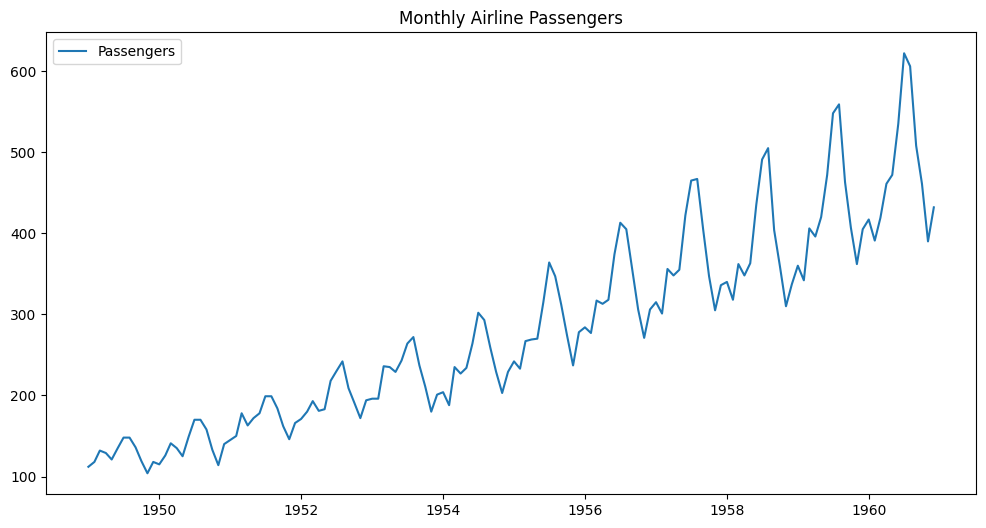

Passengers    0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data, label='Passengers')
plt.title('Monthly Airline Passengers')
plt.legend()
plt.show()

print(data.isnull().sum())


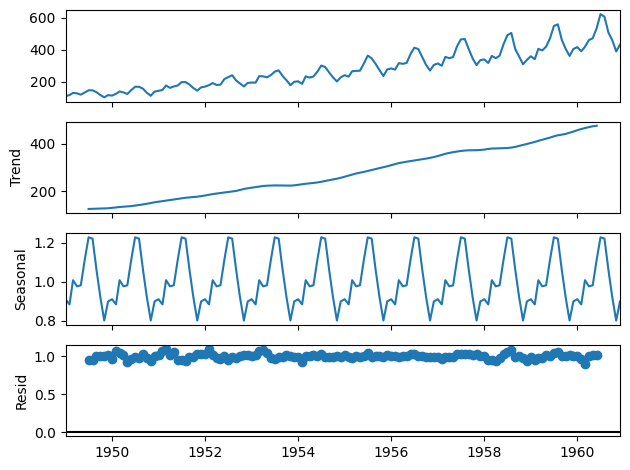

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data, model='multiplicative')
decomposition.plot()
plt.show()

# ARIMA Model (AutoRegressive Integrated Moving Average)
Make data stationary (differencing)

In [ ]:
data_diff = data.diff().dropna()

ACF and PACF plots (to identify AR and MA terms)

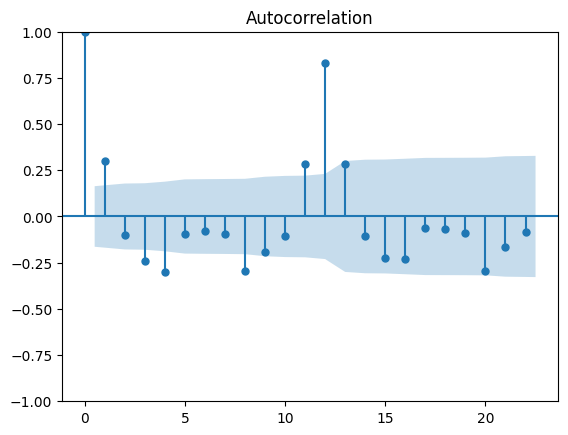

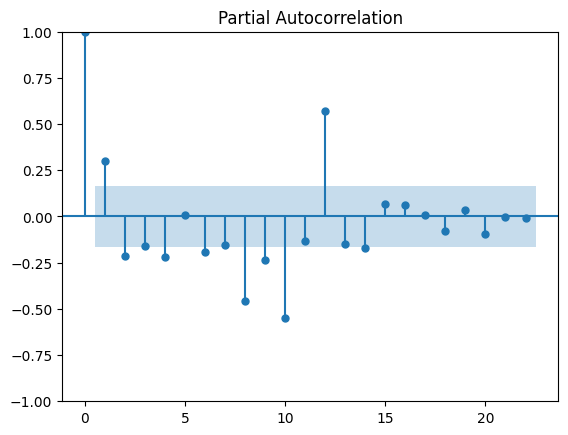

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_diff)
plot_pacf(data_diff)
plt.show()


Fit ARIMA model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Thu, 22 May 2025   AIC                           1394.683
Time:                        19:43:08   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

c:\Users\senor\Documents\Github\twt-xnn-mlops\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\senor\Documents\Github\twt-xnn-mlops\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\senor\Documents\Github\twt-xnn-mlops\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forecast

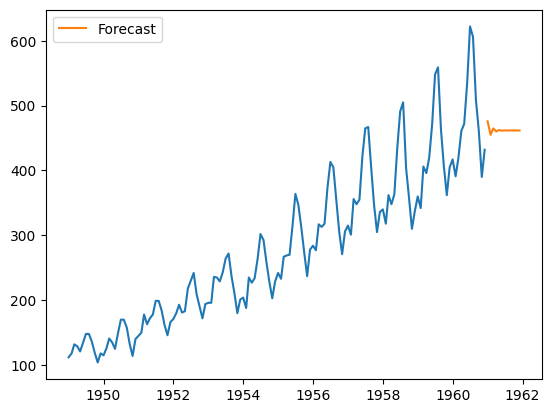

In [ ]:
forecast = model_fit.forecast(steps=12)
plt.plot(data)
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

# Prophet Model

c:\Users\senor\Documents\Github\twt-xnn-mlops\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
19:44:27 - cmdstanpy - INFO - Chain [1] start processing
19:44:28 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\senor\Documents\Github\twt-xnn-mlops\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


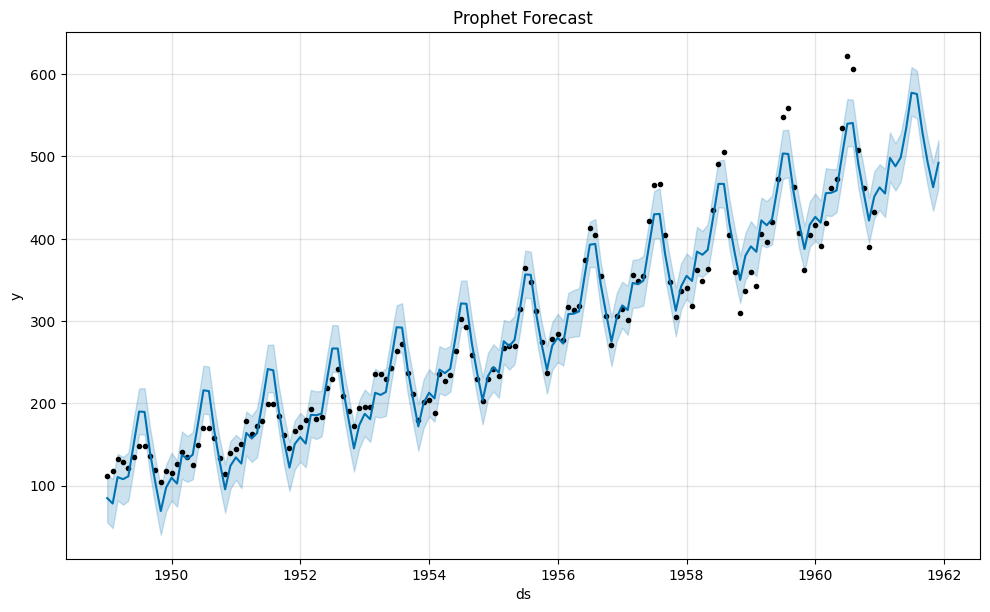

In [ ]:
from prophet import Prophet

df = data.reset_index()
df.columns = ['ds', 'y']
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)
model.plot(forecast)
plt.title("Prophet Forecast")
plt.show()

# LSTM Model (Long Short-Term Memory)
 Normalize and create sequences

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)
window_size = 10
X, y = create_sequences(scaled_data, window_size)

X = X.reshape((X.shape[0], X.shape[1], 1))


Build and train the LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=20, verbose=1)


ModuleNotFoundError: No module named 'tensorflow'

Forecast with LSTM

In [ ]:
last_sequence = scaled_data[-window_size:]
last_sequence = last_sequence.reshape((1, window_size, 1))
prediction = model.predict(last_sequence)
forecasted_value = scaler.inverse_transform(prediction)
print("Next predicted value:", forecasted_value)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices